# JSON info-arch

Testing the functionality to exchange information as JSON-like strings.

In [4]:
import json

from interpml import config, utils
from interpml import info_architecture as ia
from interpml import plotting

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pprint import pprint

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Defined by lists of (row1, col1, height, width) tuples
height, width = 10, 12

# 2-component dashboards
split = 8
spec1 = [
    (0, 0, height, split),
    (0, split, height, width - split)
]

split = 4
spec2 = [
    (0, 0, height, split),
    (0, split, height, width - split)
]

split = 4
spec3 = [
    (0, 0, split, width),
    (split, 0, height - split, width)
]

split = 6
spec4 = [
    (0, 0, split, width),
    (split, 0, height - split, width)
]

# 3-component dashboards
split = 6, 4
spec5 = [
    (0, 0, height, split[0]),
    (0, split[0], split[1], width - split[0]),
    (split[1], split[0], height - split[1], width - split[0])
]

split = 5, 6
spec6 = [
    (0, 0, height, split[0]),
    (0, split[0], split[1], width - split[0]),
    (split[1], split[0], height - split[1], width - split[0])
]

split = 5, 4
spec7 = [
    (0, 0, split[0], split[1]),
    (split[0], 0, height - split[0], split[1]),
    (0, split[1], height, width - split[1])
]

split = 4, 6
spec8 = [
    (0, 0, split[0], split[1]),
    (split[0], 0, height - split[0], split[1]),
    (0, split[1], height, width - split[1])
]

split = 4, 6
spec9 = [
    (0, 0, split[0], split[1]),
    (0, split[1], split[0], width - split[1]),
    (split[0], 0, height - split[0], width)
]

split = 6, 4
spec10 = [
    (0, 0, split[0], split[1]),
    (0, split[1], split[0], width - split[1]),
    (split[0], 0, height - split[0], width)
]

split = 4, 6
spec11 = [
    (0, 0, split[0], width),
    (split[0], 0, height - split[0], split[1]),
    (split[0], split[1], height - split[0], width - split[1])
]

split = 6, 4
spec12 = [
    (0, 0, split[0], width),
    (split[0], 0, height - split[0], split[1]),
    (split[0], split[1], height - split[0], width - split[1])
]

specs = [
    spec1, spec2, spec3, spec4, spec5, spec6,
    spec7, spec8, spec9, spec10, spec11, spec12
]

In [7]:
treemaps = []
info_archs = []
for i, arch in enumerate(specs):
    for j in range(3):
        arr = ia.spec2arr(arch, n_components=4, height=height, width=width)
        treemaps.append(arr)
        try:
            info_archs.append(ia.InfoArchTree.from_array(i * 20 + j, arr, height=height, width=width))
        except:
            pass

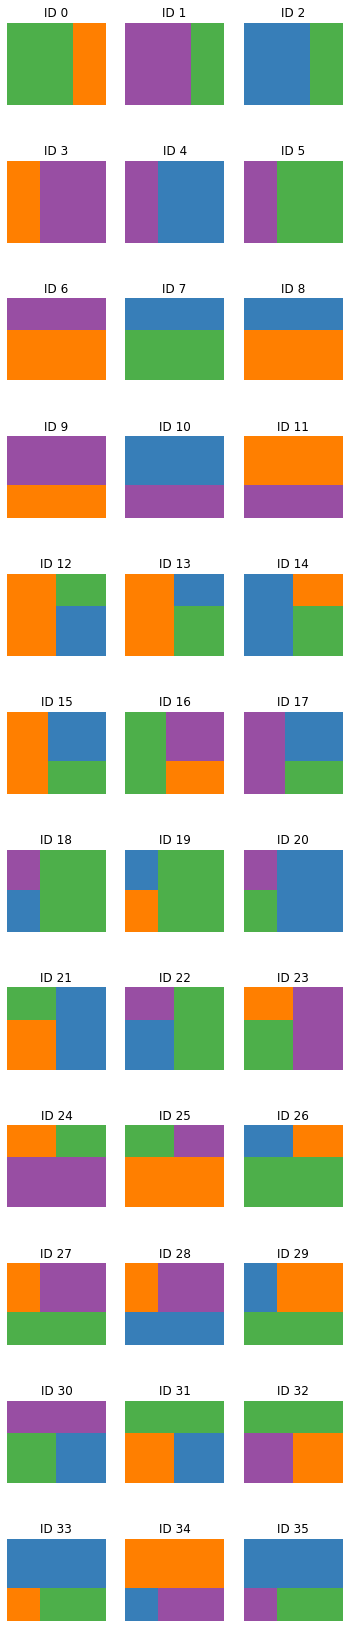

In [8]:
fig, axs = plt.subplots(len(specs), 3, figsize=(3 * 2, len(specs) * 2.5))
for i, (treemap, ax) in enumerate(zip(treemaps, axs.flat)):
    plotting.plot_treemap(treemap, ax=ax, vmin=0, vmax=9, cmap='Set1')
    ax.set_title(f'ID {i}')
    ax.axis('off')

In [9]:
jsondict = info_archs[19].to_json()
tree = ia.InfoArchTree.from_json(jsondict)

In [10]:
print(tree)

[], 1.00, v
|----[], 0.33, v
|    |----1.0, 0.50, h
|    |----[], 0.50, h
|    |    |----4.0, 1.00, h
|----2.0, 0.67, v


In [11]:
tree.root.right.orientation

'v'

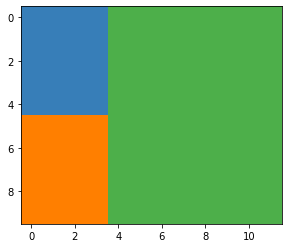

In [12]:
plotting.plot_treemap(treemaps[19], vmin=0, vmax=9, cmap='Set1')

In [13]:
tree.height

10

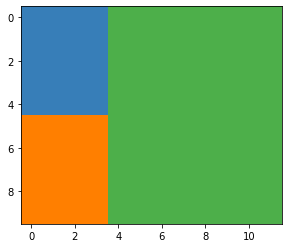

In [14]:
plotting.plot_treemap(tree.to_array(), vmin=0, vmax=9, cmap='Set1')

## Saving info_archs

In [15]:
ia_json = {"architectures": list([info_arch.to_json() for info_arch in info_archs])}

In [18]:
pprint(ia_json["architectures"][0])

{'components': {'height': 1,
                'id': -1,
                'left_child': {'height': 1,
                               'id': 2.0,
                               'left_child': {},
                               'orientation': 'v',
                               'right_child': {},
                               'width': 0.6666666666666666},
                'orientation': 'v',
                'right_child': {'height': 1,
                                'id': -1,
                                'left_child': {'height': 1,
                                               'id': 4.0,
                                               'left_child': {},
                                               'orientation': 'v',
                                               'right_child': {},
                                               'width': 1.0},
                                'orientation': 'v',
                                'right_child': {},
                                'width': 0.3

In [127]:
json.dump(ia_json, config.ia_layouts_file.open('w'))

In [129]:
jsondict = json.load(config.ia_layouts_file.open('r'))

In [135]:
treemaps_reloaded = list([ia.InfoArchTree.from_json(info_arch).to_array() for info_arch in jsondict['architectures']])

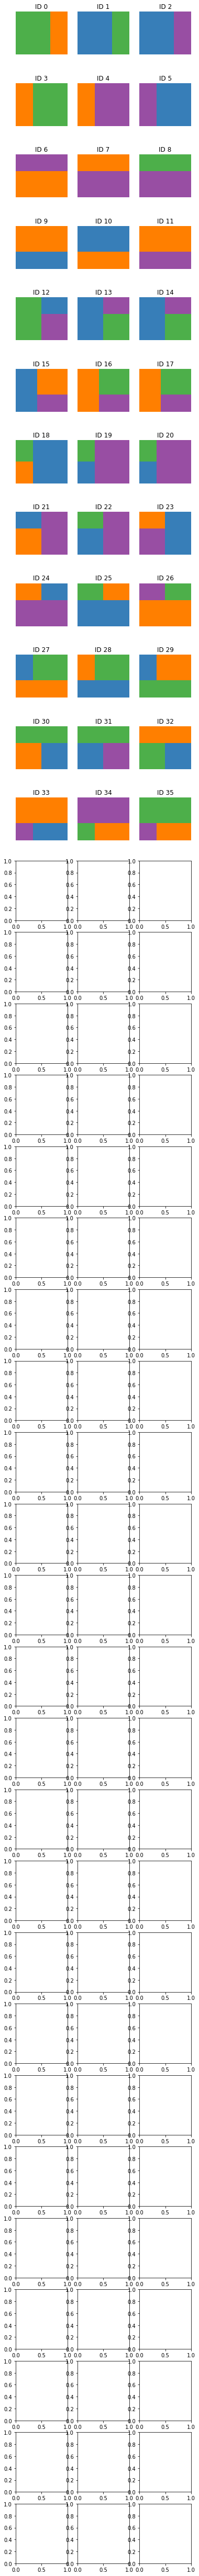

In [136]:
fig, axs = plt.subplots(len(treemaps_reloaded), 3, figsize=(3 * 2, len(treemaps_reloaded) * 2.5))
for i, (treemap, ax) in enumerate(zip(treemaps_reloaded, axs.flat)):
    plotting.plot_treemap(treemap, ax=ax, vmin=0, vmax=9, cmap='Set1')
    ax.set_title(f'ID {i}')
    ax.axis('off')

In [138]:
ia_features = np.stack(list([info_arch.get_feature_vector() for info_arch in info_archs]), axis=0)

In [141]:
ia_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.33333333, 1.        , 1.66666667, ..., 0.        , 0.        ,
        0.        ],
       [3.33333333, 1.        , 1.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.33333333, 1.        , 5.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [142]:
np.savetxt(config.ia_feats_file, ia_features, delimiter=',')